In [50]:
import requests
from bs4 import BeautifulSoup
import ast
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [4]:
import requests
from bs4 import BeautifulSoup

# URL to scrape
url = "https://giavang.org/trong-nuoc/sjc/lich-su"  # Adjust the URL as needed

# Fetch the page
response = requests.get(url)
if response.status_code == 200:
    page_content = response.content

    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(page_content, 'html.parser')

    # Find all date links within the specific structure
    date_links = []
    months = soup.find_all('div', class_='thc')  # each month block

    for month in months:
        month_name = month.find('span', class_='hd').text  # e.g., "Tháng 07 / 2009"
        links = month.find_all('a', title=True)  # get all 'a' tags with a title attribute

        for link in links:
            date_text = link['title'].replace("Lịch sử giá vàng SJC ngày ", "")
            date_url = link['href']
            date_links.append({
                'date': date_text,
                'url': date_url
            })

    # Print or store the collected data
    for date_info in date_links:
        print(f"Date: {date_info['date']}, URL: {date_info['url']}")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Date: 22/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-22.html
Date: 23/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-23.html
Date: 24/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-24.html
Date: 25/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-25.html
Date: 26/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-26.html
Date: 27/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-27.html
Date: 28/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-28.html
Date: 29/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-29.html
Date: 30/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-30.html
Date: 31/07/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-07-31.html
Date: 01/08/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-08-01.html
Date: 02/08/2009, URL: https://giavang.org/trong-nuoc/sjc/lich-su/2009-08-02.html
Date: 03/08/2009

In [7]:
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import nest_asyncio

# Patch to allow asyncio to run in Jupyter Notebook
nest_asyncio.apply()

# Asynchronous function to fetch data
async def fetch_data(session, date_info):
    date = date_info['date']
    url = date_info['url']
    
    async with session.get(url) as response:
        if response.status == 200:
            page_content = await response.text()
            soup = BeautifulSoup(page_content, 'html.parser')
            
            try:
                mua_vao = soup.find('div', class_='box-cgre').find('span', class_='gold-price').text.strip()
                ban_ra = soup.find('div', class_='box-cred').find('span', class_='gold-price').text.strip()
                mua_vao = float(mua_vao.split()[0].replace('.', '').replace(',', '.'))
                ban_ra = float(ban_ra.split()[0].replace('.', '').replace(',', '.'))

                return {
                    'date': date,
                    'mua_vao': mua_vao,
                    'ban_ra': ban_ra
                }
            except AttributeError:
                print(f"Data not found for {date}")
                return None
        else:
            print(f"Failed to retrieve data for {date}. Status code: {response.status}")
            return None

# Main function to gather data concurrently
async def main(date_links):
    gold_prices = []
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_data(session, date_info) for date_info in date_links]
        results = await asyncio.gather(*tasks)
        
        # Filter out None results
        gold_prices = [result for result in results if result is not None]

    for price_info in gold_prices:
        print(f"Date: {price_info['date']}, Mua Vào: {price_info['mua_vao']} x1000đ/lượng, Bán Ra: {price_info['ban_ra']} x1000đ/lượng")

    df = pd.DataFrame(gold_prices)

    # Export the DataFrame to a CSV file
    df.to_csv('gold_prices.csv', index=False, encoding='utf-8')

    print("Data saved to gold_prices.csv")

# Run the main function with await instead of asyncio.run


await main(date_links)


Data not found for 11/09/2009
Data not found for 06/09/2009
Data not found for 07/09/2009
Data not found for 27/08/2009
Data not found for 04/09/2009
Data not found for 18/09/2009
Data not found for 17/09/2009
Data not found for 20/09/2009
Data not found for 19/09/2009
Data not found for 29/08/2009
Data not found for 03/09/2009
Data not found for 09/09/2009
Data not found for 30/08/2009
Data not found for 16/09/2009
Data not found for 31/08/2009
Data not found for 14/09/2009
Data not found for 05/09/2009
Data not found for 12/09/2009
Data not found for 10/09/2009
Data not found for 15/09/2009
Data not found for 08/09/2009
Data not found for 02/09/2009
Data not found for 28/08/2009
Data not found for 13/09/2009
Data not found for 01/09/2009
Date: 22/07/2009, Mua Vào: 21060.0 x1000đ/lượng, Bán Ra: 21120.0 x1000đ/lượng
Date: 23/07/2009, Mua Vào: 21140.0 x1000đ/lượng, Bán Ra: 21190.0 x1000đ/lượng
Date: 24/07/2009, Mua Vào: 21090.0 x1000đ/lượng, Bán Ra: 21140.0 x1000đ/lượng
Date: 25/07/2009

### Explanatory Data Analysis

In [62]:
df = pd.read_csv('gold_prices.csv')
df.rename(columns={'mua_vao': 'buy_in_price', 'ban_ra': 'sell_out_price'}, inplace=True)
print('null values:\n', df.isnull().sum())
df.head()

null values:
 date              0
buy_in_price      0
sell_out_price    0
dtype: int64


,date,buy_in_price,sell_out_price
0,22/07/2009,21060.0,21120.0
1,23/07/2009,21140.0,21190.0
2,24/07/2009,21090.0,21140.0
3,25/07/2009,21090.0,21140.0
4,26/07/2009,21090.0,21140.0


In [63]:
df = df.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.set_index('date', inplace=True)

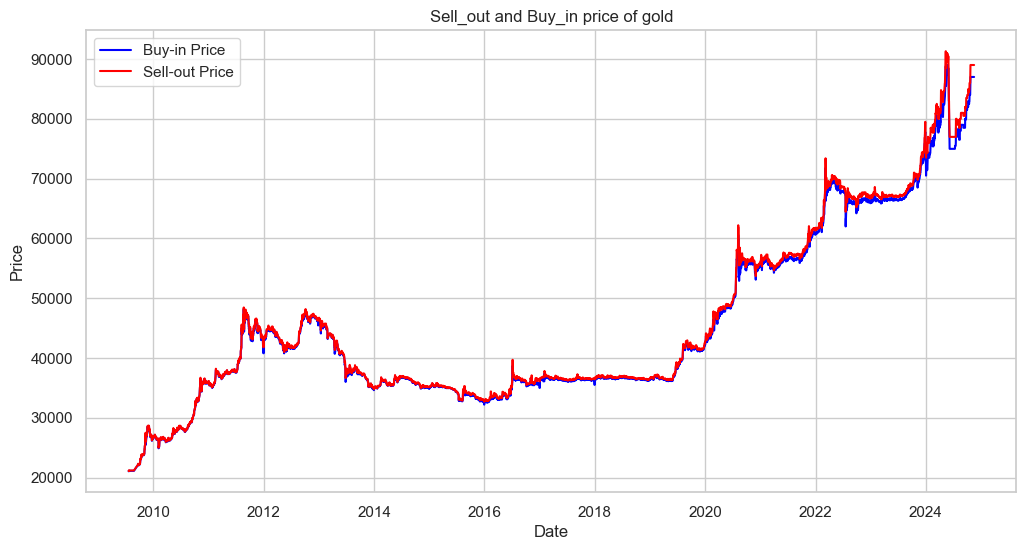

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6)) 

sns.lineplot(data=df, x='date', y='buy_in_price', label='Buy-in Price', color='blue')
sns.lineplot(data=df, x='date', y='sell_out_price', label='Sell-out Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Sell_out and Buy_in price of gold')
plt.legend()

plt.show()

<Figure size 1200x600 with 0 Axes>

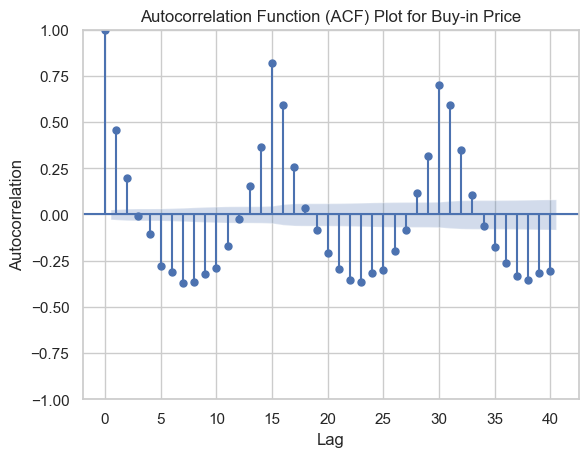

<Figure size 1200x600 with 0 Axes>

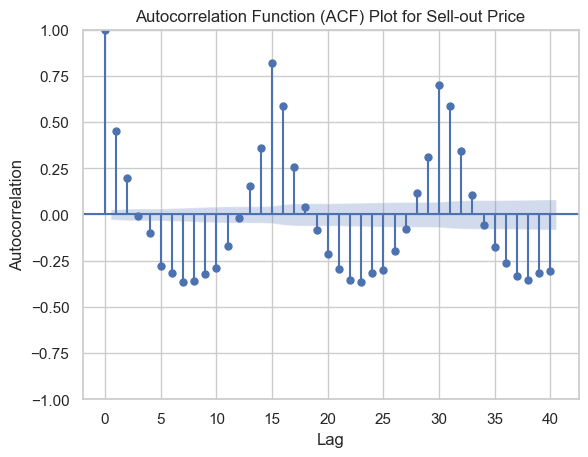

In [65]:
plt.figure(figsize=(12, 6))
plot_acf(df['buy_in_price'], lags=40) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot for Buy-in Price')
plt.show()

plt.figure(figsize=(12, 6))
plot_acf(df['sell_out_price'], lags=40) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot for Sell-out Price')
plt.show()

In [ ]:
# Detecting Stationarity
from statsmodels.tsa.stattools import adfuller

print('Buy-in Price:')
result = adfuller(df['buy_in_price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

print('\nSell-out Price:')
result = adfuller(df['sell_out_price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Buy-in Price:
ADF Statistic: -14.260567863156997
p-value: 1.4290167570447747e-26
Critical Values: {'1%': -3.4315315665877675, '5%': -2.8620621358100085, '10%': -2.567047931608169}

Sell-out Price:
ADF Statistic: -14.338054977605745
p-value: 1.0716695216237647e-26
Critical Values: {'1%': -3.4315315665877675, '5%': -2.8620621358100085, '10%': -2.567047931608169}


- ADF Statistic: The ADF statistics are quite negative (around -14), which suggests strong evidence for stationarity.
- p-value: The p-values for both series are very close to zero (1.429e-26 and 1.071e-26), which is far below 0.05. This indicates we can reject the null hypothesis and conclude that both series are likely stationary.
- Critical Values: The ADF statistics are below all the critical values (at the 1%, 5%, and 10% levels), further supporting that the series is stationary.

## Model Training